## Set-Up

In [33]:
#all packages <3
import pandas as pd
from scipy import stats 
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
#importing data, into data frame, usage of pandas(pd)
df = pd.read_csv("/Users/rachelmeade/Downloads/Seals.csv") 

In [34]:
#making sure it worked
df

,Patient Name,Date,Weight(g),Deceased(T/F),Intake Date
0,Hercules,05/21/22,6900.0,False,05/21/22
1,Hercules,05/23/22,7100.0,False,05/21/22
2,Hercules,05/26/22,7300.0,False,05/21/22
3,Hercules,05/29/22,7300.0,False,05/21/22
4,Hercules,05/30/22,7700.0,False,05/21/22
...,...,...,...,...,...
511,Sagittarius,01/29/23,15500.0,False,11/19/22
512,Sagittarius,02/01/23,17150.0,False,11/19/22
513,Sagittarius,02/08/23,19650.0,False,11/19/22
514,Sagittarius,02/15/23,22500.0,False,11/19/22


In [35]:
#I want to know the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient Name   516 non-null    object 
 1   Date           516 non-null    object 
 2   Weight(g)      516 non-null    float64
 3   Deceased(T/F)  516 non-null    bool   
 4   Intake Date    516 non-null    object 
dtypes: bool(1), float64(1), object(3)
memory usage: 16.8+ KB


## Code below is used to make Jupyter Lab do the tideous work.

In [36]:
#converting "Date" and "Intake Date" in df into datetime format that way Jupyter Lab can do the work for me down the road INSTEAD of me making changes my hand in excel.
df.Date=pd.to_datetime(df.Date, infer_datetime_format=True)
df["Intake Date"]=pd.to_datetime(df["Intake Date"], infer_datetime_format=True)

In [37]:
#creation of "Ordinal Day" which is the number of days a seal is in hospital. This is done my subtracting the intake date from the current date. 
df["Ordinal Day"] = (df.Date - df["Intake Date"]).dt.days

In [38]:
#Grouping by patient name so ordinal days stay in order for each patient. Again, Jupyter Lab can now do this for me rather than me going into Excel and typing in ordinal day on my own.
first_weight = df.groupby('Patient Name')['Weight(g)'].first().reset_index()
first_weight.columns = ['Patient Name', 'First_Weight(g)']

#Merging dfs
df = pd.merge(df, first_weight, on='Patient Name')

#Creation of "Change" (total) in weight coloumn
df['Change(g)'] = df['Weight(g)'] - df['First_Weight(g)']

## First Plot (Total Change vs Ordinal Day)

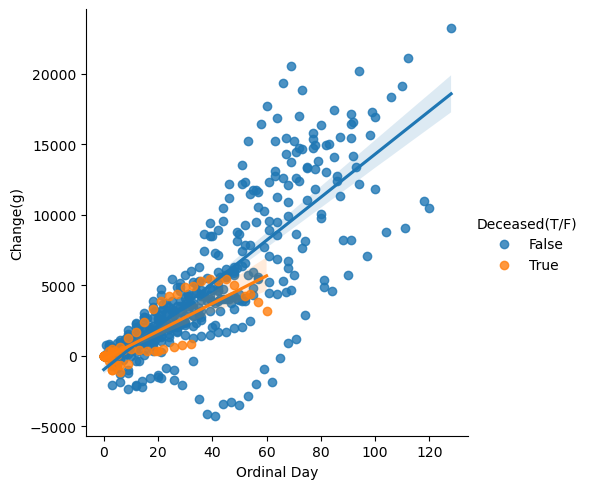

In [39]:
#My first plot. Comparing total change in relation to ordinal day. 
sns.lmplot(x='Ordinal Day', y='Change(g)', data=df, fit_reg=True, hue='Deceased(T/F)')
plt.show()


*Figure 1.*  Scatter plot with a linear regression line that shows the relationship between the "Ordinal Day" and "Change(g)" (cumulative change) variables in our dataset of harbor seals. The "Ordinal Day" variable represents the number of days since a harbor seal was admitted to a rehabilitation center, while "Change(g)" represents the cumulative change in weight of the harbor seal in grams per day during rehabilitation. The plot is colored by the "Deceased(T/F)" variable, which indicates whether the seal survived or died during rehabilitation. 

I generated this plot using the seaborn package's "lmplot" function, which fits and plots a linear regression model to the data. The plot also includes the regression equation and R-squared value, which describe the strength and direction of the relationship between the two variables. 

This plot does not show strong correlation between ordinal date and change(g) as having an impact on if the seal died or was released. 

I then tried analyzing just the first 20 days worth of data as that is where most of the "deceased" data points lie to see if in a smaller window there are stronger differences, there was not. 

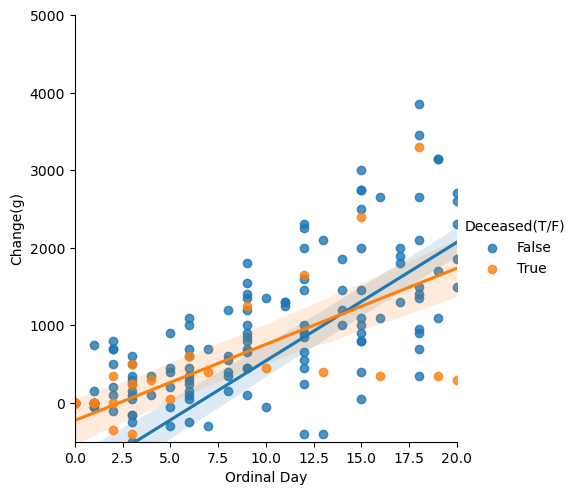

In [40]:
#Code for same plot as *Figure 1* but xlim (0,20).
ax = sns.lmplot(x='Ordinal Day', y='Change(g)', data=df, fit_reg=True, hue='Deceased(T/F)')
plt.xlim(0,20)
plt.ylim(-500,5000)
plt.show()


*Figure 2.* Scatter plot focusing on the first 20 ordinal days in rehabilitation with a linear regression line that shows the relationship between the "Ordinal Day" and "Change(g)" (cumulative change) variables in our dataset of harbor seals. The "Ordinal Day" variable represents the number of days since a harbor seal was admitted to a rehabilitation center, while "Change(g)" represents the cumulative change in weight of the harbor seal in grams per day during rehabilitation. The plot is colored by the "Deceased(T/F)" variable, which indicates whether the seal survived or died during rehabilitation. 

Analyzing this plot, I concluded that cumualitive weight change is not a good measurment of a seals probability of living or dying as the data points are intermixed with no strong correlation one way or another. 

Due to this, I decided to anaylize weight change from each weigh-in rather than cumulative weight. I decided to do this because in *Figure 1.* you can see a deceased seals weight tapers off around 5000 grams around day 30 whereas the seal's that were released continue to gain weight, therefore this could be a good way to analyze weight/weigh-in and deceased correlation.

## Plot of change in weight since last weigh in (a useless plot to answer our question but a useful plot to my learning) -

First, I am changing xlim so that it only focuses on data where a deceased seal was also weighed. From day 65+ the only data points are for released seals and threfore have nothing to compare them to.

In [41]:
#Setting new x-axis 
xmin, xmax = 0, 65

In [42]:
#Change in weight since last weigh in.
df['Last_Weigh(g)'] = df.groupby("Patient Name")["Weight(g)"].diff()

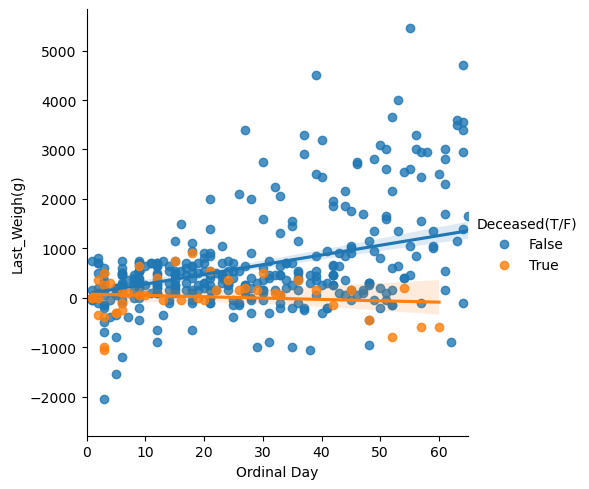

In [43]:
#Plot code
sns.lmplot(x='Ordinal Day', y='Last_Weigh(g)', data=df, fit_reg=True, hue='Deceased(T/F)')
plt.xlim(xmin, xmax)
plt.show()

*Figure 3.* Scatter plot with linear regression line showing the relationship between the number of days since a harbor seal was admitted to a rehabilitation center (Ordinal Day) and the change in weight in grams since the last weigh-in. The data is colored by whether the seal survived or died during rehabilitation.

### **Valuable Error** ###
When I first created this plot the y-axis was "Daily Change". However, I orginally did not account/consider the fact that weigh-ins are not done daily. Weigh-ins vary from 1-7days apart depedning on the seals health. Because of this, this is not an effective way to answer our questoin because of this variation. However, this plot is still important to leave in my project as it was part of my analysis an thought process. From it I was able to learn new coding skills as well as visualize the plot and critically think about why it is not useful and what I need to do to actually create a "Daily Change" plot.

## Daily Change vs Ordinal Day Raw

In [44]:
grouped = df.groupby('Patient Name')
#Since above was not a good way of tracking weight, below is the actual code for rate of daily change. 
df['Daily_Change(g)'] = grouped['Weight(g)'].diff()/grouped['Date'].diff().dt.days

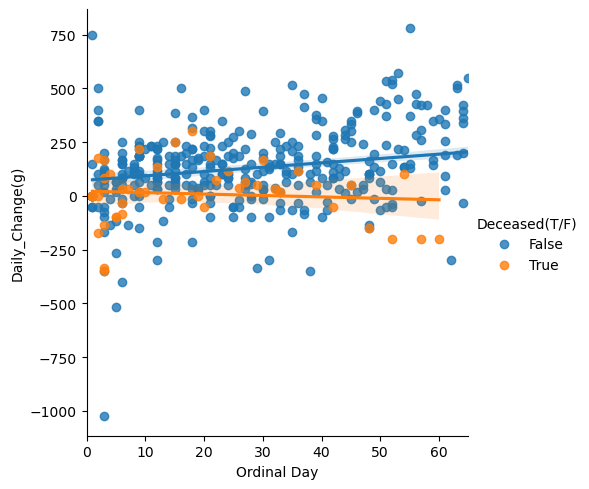

In [45]:
#Daily Change Plot
sns.lmplot(x='Ordinal Day', y='Daily_Change(g)', data=df, fit_reg=True, hue='Deceased(T/F)')
plt.xlim(xmin, xmax)
plt.show()

*Figure 4.* Scatter plot with linear regression line showing the relationship between the number of days since a harbor seal was admitted to a rehabilitation center (x-axis) and the daily change in weight in grams per day (y-axis). The data is colored by whether the seal survived or died during rehabilitation.

The data was analyzed using the pandas package to calculate the daily change in weight for each seal, which was then plotted using the seaborn package's "lmplot" function.

## Daily Change vs Ordinal Day Removing Outliers

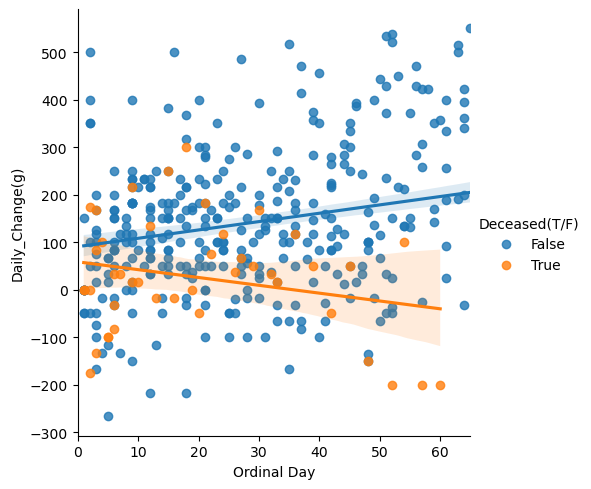

In [46]:
#Removing outliers

# Calculate the interquartile range (IQR)
Q1 = df['Daily_Change(g)'].quantile(0.25)
Q3 = df['Daily_Change(g)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Filter the data frame to exclude the outliers
df_filtered = df.loc[(df['Daily_Change(g)'] >= lower_bound) & (df['Daily_Change(g)'] <= upper_bound)]

# Plot the filtered data frame
sns.lmplot(x='Ordinal Day', y='Daily_Change(g)', data=df_filtered, fit_reg=True, hue='Deceased(T/F)')
plt.xlim(xmin, xmax)
plt.show()


*Figure 5* Scatter plot with linear regression line showing the relationship between the number of days since a harbor seal was admitted to a rehabilitation center (x-axis) and the daily change in weight in grams per day (y-axis). The data is colored by whether the seal survived or died during rehabilitation, and outliers have been removed using the interquartile range method.

## USERS ABILITY TO ADD NEW POINTS! (What I am most proud of)

### To use: Run code (shift+return) then the user will be prompted to input "Intake date", "Weight(g)", and "Current date" and the program will add a red dot to the above plot to show where the inputed seal is in relation to past seals. 

Enter intake date (YYYY-MM-DD):  2022-06-14
Enter the intake weight (in grams):  10000
Enter current date (YYYY-MM-DD):  2022-07-30
Enter the current weight (in grams):  11000


21.73913043478261


/var/folders/8_/yqhdyx4d6h5_vqshkfvqjrw00000gn/T/ipykernel_12263/2237787145.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(new_point, ignore_index=True)


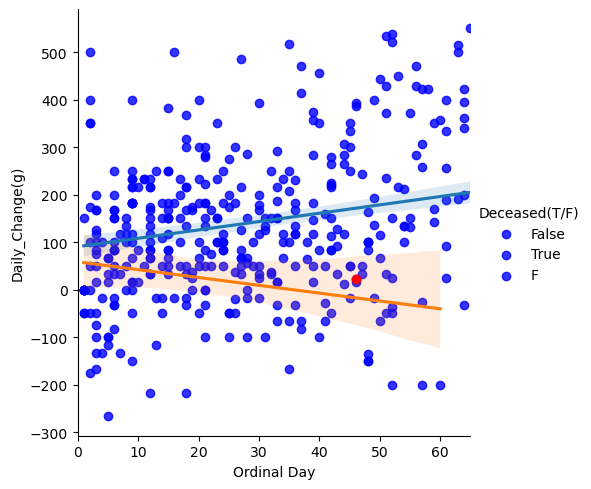

In [59]:

# Calculate the interquartile range (IQR)
Q1 = df['Daily_Change(g)'].quantile(0.25)
Q3 = df['Daily_Change(g)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Filter the data frame to exclude the outliers
df_filtered = df.loc[(df['Daily_Change(g)'] >= lower_bound) & (df['Daily_Change(g)'] <= upper_bound)]

# Take user input for the new data point
intake_date = input("Enter intake date (YYYY-MM-DD): ")
intake_weight_g = int(input("Enter the intake weight (in grams): "))
current_date = input("Enter current date (YYYY-MM-DD): ")
current_weight_g = int(input("Enter the current weight (in grams): "))
daily_change = (current_weight_g - intake_weight_g) / ((pd.to_datetime(current_date) - pd.to_datetime(intake_date)).days)
print(daily_change)

# Add a new data point to the data frame
new_point = pd.DataFrame({'Ordinal Day': [(pd.to_datetime(current_date) - pd.to_datetime(intake_date)).days],
                          'Daily_Change(g)': [daily_change],
                          'Deceased(T/F)': ['F']})


df_filtered = df_filtered.append(new_point, ignore_index=True)


# Plot the data with the new point added
sns.lmplot(x='Ordinal Day', y='Daily_Change(g)', data=df_filtered, fit_reg=True, hue='Deceased(T/F)', scatter_kws={'color': 'blue'})
plt.xlim(xmin, xmax)
plt.scatter((pd.to_datetime(current_date) - pd.to_datetime(intake_date)).days, daily_change, color='red')
plt.show()



Figure 6: This plot shows the daily weight change in grams for each patient over time, with outliers removed. A new data point (red dot) has been added to the plot based on user input for intake date and weight, and is represented as a standardized value. The blue dots represent the existing data points, with the blue line indicating the linear regression fit to the data of released patients and the orange line indicating linear regression of deceased patients. The plot is also colored by patient mortality status.

Note: The figure in general will always look the same with the only difference being where the red dot is on the plot. For my trials I inputted "2022-03-22, 8000, 2022-04-22, 11000" and "2022-06-14, 10000, 2022-07-30, 11000" but you should be able to put in any values in the provided format to place to data point as long as the date range is 60 days or less.

From this analysis of the data provided, you can not predict if a seal is going to be released or die based on weight and ordinal day alone. The plot is still beneficial in seeing where a seal does lie compared to others but should not be taken as soul source of information for a seals health. 